# Guided Project: Popular Data Science Questions

In this project, we will be investigating Data Science Stack Exchange (DSSE) from the [Stack Exchange websites](https://stackexchange.com/sites#traffic) to determine what content should a data science education company create, based on interest by subject.

**What kind of questions are welcome on this site?**

From the [help center](https://datascience.stackexchange.com/help), we have information on what type of questions should be avoid and how to ask question. The biggest take aways are:

- Avoid subjective questions.
- Ask practical questions about Data Science.
- Ask specific questions.
- Make questions relevant to others.


**What, other than questions, does the site's [home](https://datascience.stackexchange.com/) subdivide into?**

Other the [questions](https://datascience.stackexchange.com/questions) and home sections, we have 3 sections:

- [Tags](https://datascience.stackexchange.com/tags) -- a list of tags (keywords or labels that categorize questions);
- [Users](https://datascience.stackexchange.com/users) -- a list of users;
- [Unanswered Questions](https://datascience.stackexchange.com/unanswered) -- a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.


**What information is available in each post?**

- For both questions and answers:
  - The posts's score;
  - The posts's title;
  - The posts's author;
  - The posts's body;
- For questions only:
   - How many users have it on their "
   - The last time the question as active;
   - How many times the question was viewed;
   - Related questions;
   - The question's tags;


**STACK EXCHANGE DATA EXPLORER**

After a spending some time investigating the website, we have decided that the tags will be very useful in categorizing content.

From this [section](https://data.stackexchange.com/datascience/query/new) of the site, we can see what are the tables names and their columns. Running queries on the dedicated space will give us some informations.

[Query on Tags table](https://data.stackexchange.com/datascience/query/1386722).

After more investigations, some tables of interest would be Tags, TagSynonyms, Posts, and PostTags.
 

**GETTING THE DATA**

Let's explore the posts table. this table has a lot of columns but we will focus on the relevant ones:
- `Id` : An identification number for the post.
- `PostTypeId` : An identification number for the type of post. From the PostTypes table:

|   Id  |     Name     |
| :---: |     :---:    |
|  1    |   Questions  |
|  2    |   Answer     |
|  3    |   Wiki       |
|  4    |TagWikiExcerpt|
|  5    |   TagWiki    |
|  6    |ModeratorNomination|
|  7    |WikiPlaceholder|
|  8    | PrivilegeWiki |

- `CreationDate` : The date and time of creation of the post.
- `Score` : The post's score.
- `ViewCount` : How many times the post was viewed 
- `Tags` : What tags were used.
- `AnswerCount` : How many answers the question got (only applicable to question posts).
- `FavoriteCount` : How many times the question was [favored](https://meta.stackexchange.com/questions/53585/how-do-question-bookmarks-work) (only applicable to question posts).

[Query extracting columns listes above for all questions in 2019](https://data.stackexchange.com/datascience/query/1386744).

The results was stored in file called '2019_questions.csv' that we will explore next.

**EXPLORING THE DATA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the data
questions = pd.read_csv('2019_questions.csv')
questions

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [3]:
# General infos
print(questions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB
None


We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats. We might also wanted to change the type of the CreationDate column to datetime but we won't use this column to reach our goal.

Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.

In [4]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)


We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags ([source](https://meta.stackexchange.com/questions/18878/how-do-i-correctly-tag-my-questions/18879#18879)), so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.

However, we'll just keep them as a list.

**CLEANING THE DATA**

Let's clean the data according to issues we talked about above.

In [5]:
questions.fillna(0, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype('int')
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])
print(questions.info())

questions['Tags'] = questions['Tags'].str.replace('><', ',').str.replace('<', '').str.replace('>', '').str.split(',')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB
None


In [6]:
# Example
print(questions.loc[2536, 'Tags'])

print(questions.info())

['dataset', 'audio-recognition']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB
None


**MOST USED AND MOST VIEWED**

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [7]:
# How many time each tag was used
tag_dict = {}

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_dict:
            tag_dict[tag] += 1
        else:
            tag_dict[tag] = 1
tag_dict

{'.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,
 'books': 

Let's transform the dictionary into a dataframe

In [8]:
tag_dict = pd.DataFrame.from_dict(tag_dict, orient="index")
tag_dict.rename(columns={0: "Count"}, inplace=True)
tag_dict.head(10)

,Count
kendalls-tau-coefficient,1
hierarchical-data-format,7
serialisation,3
attention-mechanism,26
association-rules,19
feature-scaling,59
stacked-lstm,7
nlp,493
anaconda,20
multiclass-classification,131


We will now create a vizualization for the top 20 tags.

In [9]:
top_tags_count = tag_dict.sort_values(by="Count").tail(20)
top_tags_count

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


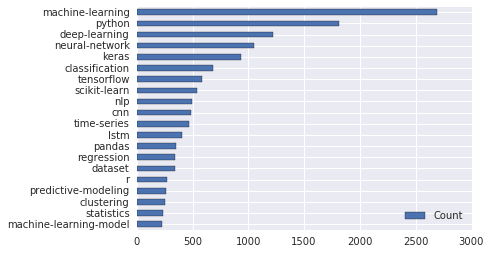

In [10]:
top_tags_count.plot(kind="barh")

Some tags are very, very broad and are unlikely to be useful; e.g.: python, dataset, r.

**RELATIONS BETWEEN TAGS**


One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

We'll begin by creating a list of all tags. After, we'll now create a dataframe where each row will represent a tag, and each column as well.

In [11]:
all_tags = list(tag_dict.index)
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,kendalls-tau-coefficient,hierarchical-data-format,serialisation,attention-mechanism
kendalls-tau-coefficient,NaN,NaN,NaN,NaN
hierarchical-data-format,NaN,NaN,NaN,NaN
serialisation,NaN,NaN,NaN,NaN
attention-mechanism,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [15]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

relations_most_used = associations.loc[top_tags_count.index, top_tags_count.index]

In [16]:
relations_most_used

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,896,12,12,84,28,48,32,16,20,28,16,16,72,36,84,68,40,76,148,556
statistics,12,936,12,64,64,68,64,12,4,88,4,12,24,0,76,12,44,48,140,356
clustering,12,12,1028,0,64,20,8,20,12,80,0,36,96,0,48,0,32,8,180,244
predictive-modeling,84,64,0,1060,52,28,112,16,52,124,24,4,48,24,108,44,52,128,140,492
r,28,64,64,52,1072,24,40,8,12,88,8,16,4,4,40,40,36,20,96,252
dataset,48,68,20,28,24,1360,24,56,28,24,44,44,36,36,112,52,80,128,212,396
regression,32,64,8,112,40,24,1388,24,44,96,24,8,148,36,136,124,168,84,236,476
pandas,16,12,20,16,8,56,24,1416,28,76,4,12,148,12,12,12,4,4,976,248
lstm,20,4,12,52,12,28,44,28,1608,348,96,76,8,172,80,532,276,412,244,284
time-series,28,88,80,124,88,24,96,76,348,1864,32,0,48,36,100,204,132,176,420,524


It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

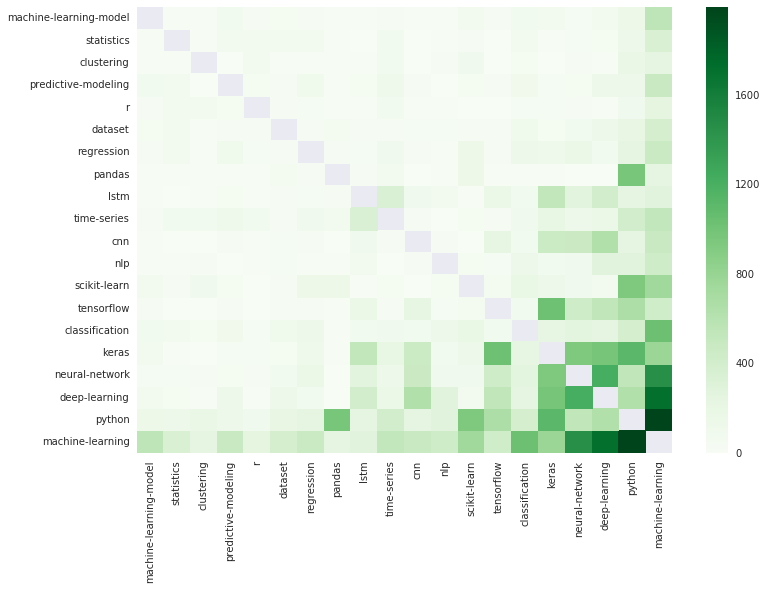

In [18]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)


The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

**ENTER DOMAIN KNONLEDGE**

[Keras](https://keras.io/), [scikit-learn](https://scikit-learn.org/stable/), [TensorFlow](https://www.tensorflow.org/) are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

**JUST A FAD?**

Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Could interest in deep learning be slowing down?


In [19]:
# Read data and clean 'Tags' column
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")



Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in top_tags_count and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [20]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

all_q

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


Since we don't have all the data for the first quarter of 2021, we'll get rid of those dates:

In [21]:

all_q = all_q[all_q["CreationDate"].dt.year < 2021]

Let's create a column that identifies the quarter in which a question was asked.

In [22]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [23]:
all_q

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1
5,45428,2019-02-12 05:43:18,[cnn],1,19Q1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0,19Q1
7,45431,2019-02-12 07:26:56,[machine-learning],0,19Q1
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1,19Q1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1,19Q1



For the final stretch of this screen, we'll group by quarter and:

- Count the number of deep learning questions.
- Count the total number of questions.
- Compute the ratio between the two numbers above.

In [29]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                             /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783
2,14Q4,21,216,0.097222
3,15Q1,18,190,0.094737
4,15Q2,28,284,0.098592
5,15Q3,45,311,0.144695
6,15Q4,66,382,0.172775
7,16Q1,110,516,0.213178
8,16Q2,109,518,0.210425
9,16Q3,161,585,0.275214


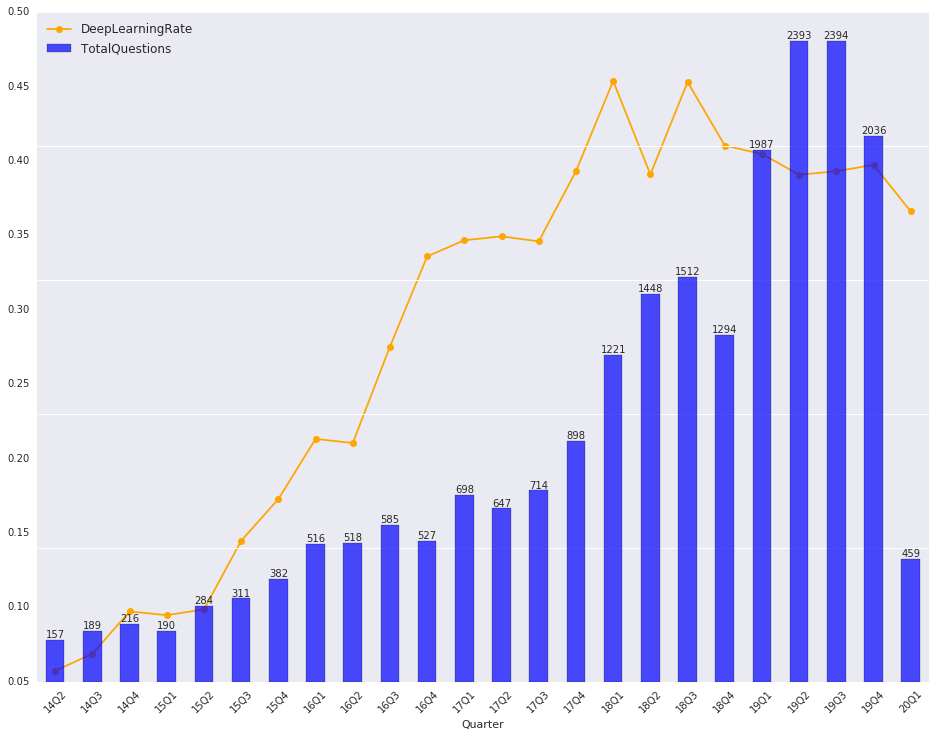

In [45]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(16,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45, color='blue')

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start. There is no evidence to suggest that interest in deep learning is decreasing apart on last quarter.But, we maintain our previous idea of proposing that we create deep learning content.